<a href="https://colab.research.google.com/github/prodoInaya/cinema/blob/main/%D1%81inema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Взглянем на наши данные и посмотрим на статистические характеристики каждой выборки: общее количество данных, среднее, минимум, максимум, квартили 25%, 50%, 75% и стандартное отклонение данных. Конечно, для столбцов с нечисловыми значениями мы не сможем посчитать данные характеристики, да и не все посчитанные значения будут иметь для нас смысл.
Так, наибольший интерес о статистических характеристиках могут вызвать данные из number_of_tickets, sales_in_cu и ticket_price_in_cu для анализа спроса посетителей кинотеатра.

In [ ]:
import numpy as np
import math
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_excel('/content/cinema.xlsx')
df = pd.DataFrame(dataset)
print(dataset.head())
print(df.describe())

   order_id creation_date session_date  movie_id         movie_name  \
0   2441412    2020-03-07   2020-03-07     32452  Маленькие женщины   
1   2169133    2020-02-03   2020-02-04     32452  Маленькие женщины   
2   2187694    2020-02-06   2020-02-06     32452  Маленькие женщины   
3   2182225    2020-02-05   2020-02-05     32452  Маленькие женщины   
4   2209967    2020-02-08   2020-02-12     32452  Маленькие женщины   

  movie_duration movie_age_restriction  movie_rating  genre_is_triller  \
0            135                   12+           7.7               0.0   
1            135                   12+           7.7               0.0   
2            135                   12+           7.7               0.0   
3            135                   12+           7.7               0.0   
4            135                   12+           7.7               0.0   

   genre_is_military  ...  number_of_tickets  \
0                0.0  ...                  2   
1                0.0  ...       

Посмотрим на распределение количества проданных билетов по дням недели (отдельно рассмотрим creation_date и session_date - дата покупки билетов и дата сеанса)

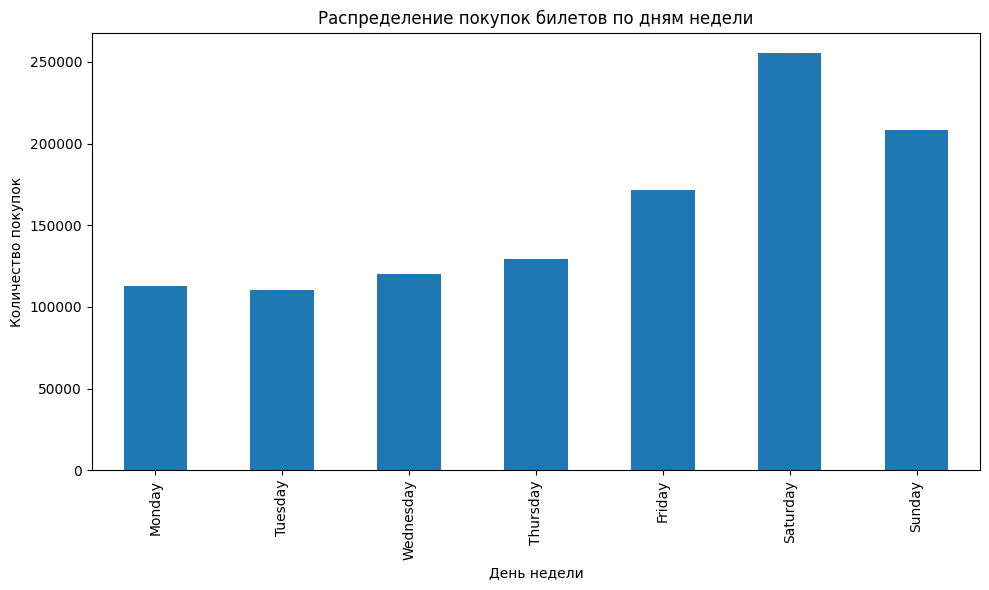

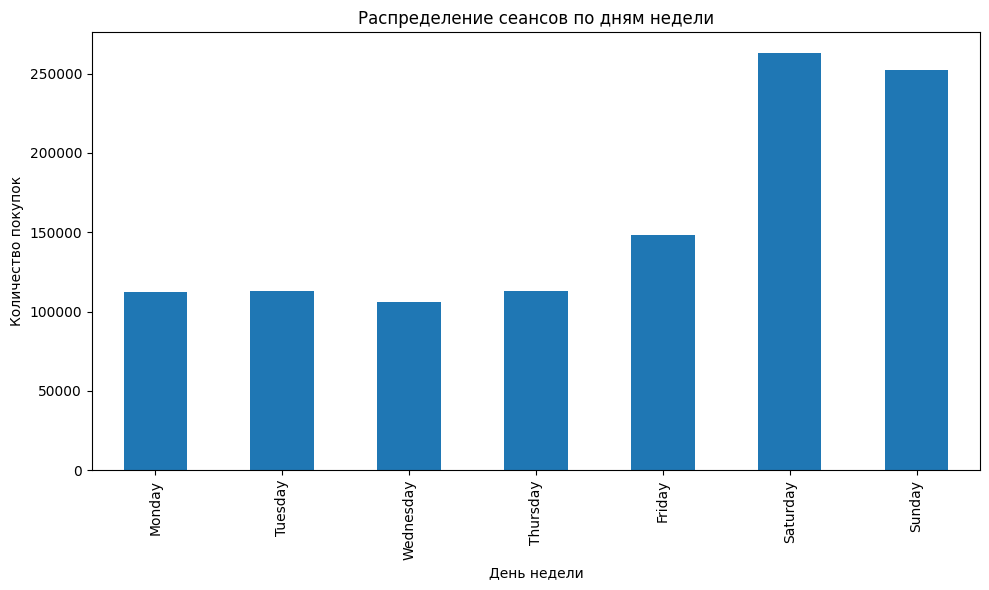

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/cinema_successful_orders.csv', delimiter=';')

df['creation_date'] = pd.to_datetime(df['creation_date'], dayfirst=True)
df['session_date'] = pd.to_datetime(df['session_date'], dayfirst=True)

df['day_of_week_сreation'] = df['creation_date'].dt.day_name()
df['day_of_week_session'] = df['session_date'].dt.day_name()

weekday_counts_cr = df.groupby('day_of_week_сreation')['number_of_tickets'].sum()
weekday_counts_se = df.groupby('day_of_week_session')['number_of_tickets'].sum()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts_cr = weekday_counts_cr.reindex(ordered_days)
weekday_counts_se = weekday_counts_se.reindex(ordered_days)

plt.figure(figsize=(10, 6))
weekday_counts_cr.plot(kind='bar')
plt.title('Распределение покупок билетов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество покупок')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
weekday_counts_se.plot(kind='bar')
plt.title('Распределение сеансов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество покупок')
plt.tight_layout()
plt.show()

Как мы видим, распределения по дням недели покупки билетов и сеансов довольны схожи. Максимальное количество покупок люди совершают в субботу, а вот максимальное количество сеансов приходится на субботу и воскресенье (практически в одинаковом количестве).

Далее рассмотрим распределение продаж билетов по различным жанрам фильмов и возрастным категориям, с помощью которого мы поймем целевую аудиторию посетителей кинотеатров.


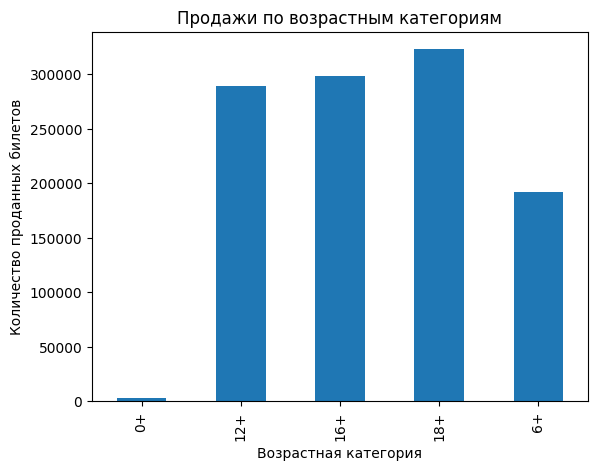

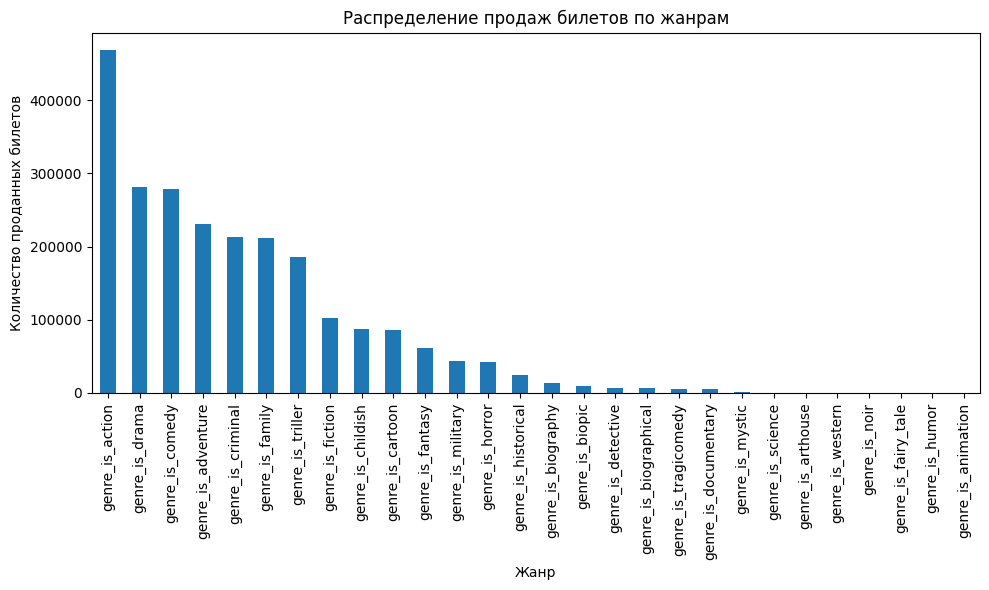

In [ ]:
age_category_sales = df.groupby('movie_age_restriction')['number_of_tickets'].sum()
age_category_sales.plot(kind='bar')
plt.title('Продажи по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество проданных билетов')
plt.show()

genre_columns = [col for col in df.columns if 'genre_is_' in col]
genre_counts = df[genre_columns].multiply(df['number_of_tickets'], axis="index").sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Распределение продаж билетов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных билетов')

plt.tight_layout()
plt.show()

Как мы видим, посетители кинотеатров больше всего предпочитают боевики, драмы и комедии. Меньше всего предпочитают анимации, однако, если обратить внимание на классификацию жанров, можно заметить, что в датасете присутствуют схожие жанры, выделенные как отдельные: comedy и humor как отдельные виды жанров, cartoon и animation. Для более корректного анализа наименее популярных жанров стоит объединить данные столбцы.
Из распределения по возрастному ограничению видим, что меньше всего люди ходят на фильмы 0+, несколько больше на 6+ и чаще всего на 18+.

Рассмотрим, на какие жанры люди предпочитают ходить группой.

In [ ]:
genre_columns = [col for col in df.columns if 'genre_is_' in col]

genre_distribution = pd.DataFrame()
for genre in genre_columns:
    genre_data = df[df[genre] == 1]
    stats = {
        'mean': genre_data['number_of_tickets'].mean(),
        'median': genre_data['number_of_tickets'].median(),
        'min': genre_data['number_of_tickets'].min(),
        'max': genre_data['number_of_tickets'].max()}
    genre_distribution = pd.concat([genre_distribution, pd.DataFrame(stats, index=[genre])])

print(genre_distribution)

                           mean  median  min  max
genre_is_triller       2.023480     2.0  1.0  6.0
genre_is_military      1.970310     2.0  1.0  6.0
genre_is_action        2.071360     2.0  1.0  6.0
genre_is_biographical  1.940583     2.0  1.0  6.0
genre_is_fairy_tale         NaN     NaN  NaN  NaN
genre_is_science       2.476440     2.0  1.0  6.0
genre_is_fantasy       2.183175     2.0  1.0  6.0
genre_is_historical    2.172938     2.0  1.0  6.0
genre_is_drama         1.991627     2.0  1.0  6.0
genre_is_animation          NaN     NaN  NaN  NaN
genre_is_cartoon       2.399555     2.0  1.0  6.0
genre_is_documentary   1.728370     2.0  1.0  6.0
genre_is_adventure     2.260800     2.0  1.0  6.0
genre_is_fiction       2.111804     2.0  1.0  6.0
genre_is_childish      2.289573     2.0  1.0  6.0
genre_is_horror        2.035714     2.0  1.0  6.0
genre_is_humor              NaN     NaN  NaN  NaN
genre_is_western       1.852941     2.0  1.0  4.0
genre_is_noir          1.500000     1.5  1.0  2.0


На удивление, больше всего среднее по количеству покупок билетов пришлось на категорию genre_is_science.
Построим диаграмму рассеяния для зависимости количества проданных билетов от стоимости одного билета:

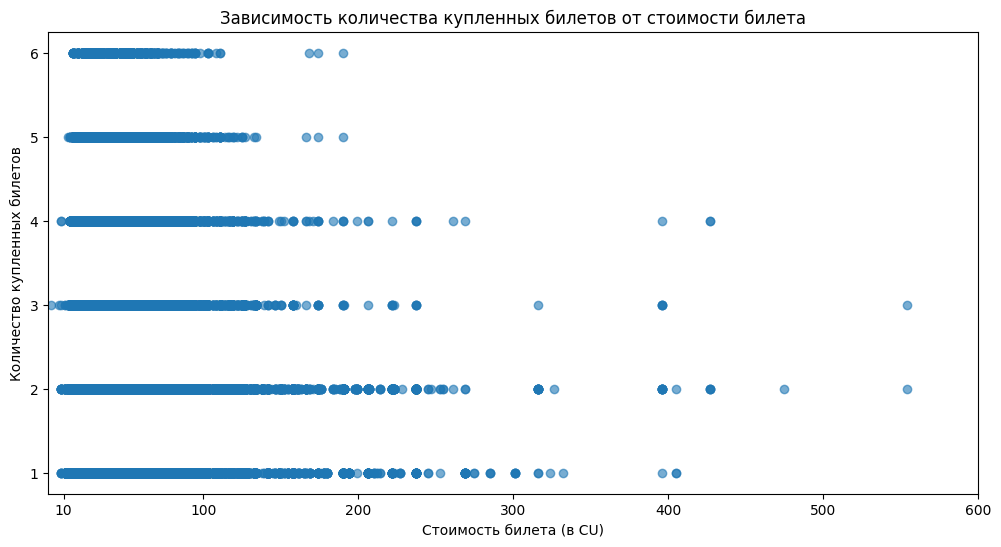

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/cinema_successful_orders.csv', delimiter=';')

df['number_of_tickets'] = df['number_of_tickets'].dropna().astype(int)
df['ticket_price_in_cu'] = df['ticket_price_in_cu'].str.replace(',', '.').astype(float).round(0).dropna().astype(int)

plt.figure(figsize=(12, 6))
plt.scatter(df['ticket_price_in_cu'], df['number_of_tickets'], alpha=0.6)
plt.title('Зависимость количества купленных билетов от стоимости билета')
plt.xlabel('Стоимость билета (в CU)')
plt.xlim(0, 600)
plt.xticks([10, 100, 200, 300, 400, 500, 600])
plt.ylabel('Количество купленных билетов')
plt.show()

Видим, что 6 билетов сразу покупает меньшее количество людей, но при увеличении стоимости одного билета количество таких покупок еще больше сокращается. Для каждого типа покупки (от 1 до 6 билетов) имеется тендеция снижения частоты с увеличением стоимости одного билета.

Нам хотелось бы научиться предугадывать объем продаж билетов
по характеристикам фильмов. Построим модель линейной регрессии и оценим ее качество с помощью среднеквадратической ошибки и коэффициента детерминации.
Характеристики кинопоказа, которые мы можем учитывать - продолжительность фильма, рейтинг фильма, ограничения по возрасту, жанр фильма, адрес кинотеатра, жанр фильма, название фильма. Переменная, которую мы хотим научиться предсказывать - выручка за билет/заказ (посмотрим, где показатели получатся лучше).

Наивная реализация:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv('/content/cinema_successful_orders.csv', delimiter=';')

for col in ['movie_rating']:
    df[col] = df[col].str.replace(',', '.').fillna(0).astype(float)
df['movie_duration'] = df['movie_duration'].str.replace(' мин.', '').str.replace(' минут', '').str.replace('-', '0').fillna('0')
for col in ['movie_duration']:
  df[col] = df[col].str.replace(',', '.').astype(float)
df['sales_in_cu'] = df['sales_in_cu'].str.replace(',', '.').astype(float)
df['sales_in_cu'] = df['sales_in_cu'].round().astype(int)
df['movie_age_restriction'] = df['movie_age_restriction'].str.replace('+', '').fillna('0').astype(int)

genre_columns = [col for col in df.columns if 'genre_is_' in col]
X = df[['movie_rating', 'movie_duration', 'movie_age_restriction']]
y = df['sales_in_cu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Среднеквадратичная ошибка (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации (R^2): {r2_score(y_test, y_pred)}')

Среднеквадратичная ошибка (MSE): 3652.5468769063154
Коэффициент детерминации (R^2): 0.006060266072346332


Показатели качества линейной регрессии говорят нам о плохой предсказуемости модели (так как чем меньше MSE и чем больше коэффициент корреляции, тем лучше). Важно очистить данные от выбросов и, возможно, стоит использовать регуляризацию для предотвращения переобучения модели, попробовать подобрать другие признаки. Попробуем улучшить показатели:


Основная проблема - более тщательная предобработка данных от выбросов, некорректных значений и приведение данных к стандартизированному виду.

 Так, при анализе рейтинга фильмов оказалось, что большинство фильмов по этому критерию имеют значение 0 (обратимся к вартилям - для столбца movie_rating квартили 25 и 50 - нулевые значения, и только квартиль 75 имеет значение 6. Поэтому, при построении линейной регрессии эти данные лучше либо не учитывать, либо взять весьма ограниченную выборку (около 25 процентов от всех данных).

 Рассмотрим статистические характеристики для других характеристик фильма, например, для movie_duration:

In [ ]:
# Посмотрим на статистические значения movie_duration
df['movie_duration'] = df['movie_duration'].astype(str)
df['movie_duration'] = df['movie_duration'].str.replace(' мин.', '').str.replace(' минут', '').str.replace('-', '0').astype(float)
df = df[df['movie_duration'] > 0]
df['movie_duration'] = df['movie_duration'].astype(str)
for col in ['movie_duration']:
  df[col] = df[col].str.replace(',', '.').astype(float)
df['movie_duration'].describe()

count    517797.000000
mean        119.539022
std          18.219339
min          57.000000
25%         108.000000
50%         115.000000
75%         132.000000
max         450.000000
Name: movie_duration, dtype: float64

В длительности фильмов устранили некорректные значения в виде нулевых значений - таких значений быть не может. Достаточно большое значени std говорит нам о том, что в дальнейшем стоит воспользоваться стандартизацией данных, устанавливающая для распределения среднее значение равное 0 и стандартное отклонение равное 1.

Посмотрим также на статистические характеристики movie_age_restriction:

In [ ]:
df['movie_age_restriction'] = df['movie_age_restriction'].str.replace('+', '').fillna('0').astype(int)
df['movie_age_restriction'].describe()

count    517797.000000
mean         14.062955
std           4.119832
min           0.000000
25%          12.000000
50%          16.000000
75%          18.000000
max          18.000000
Name: movie_age_restriction, dtype: float64

Как мы видим, некорректных значений нет. Значение std все также гвоорит нам о том, что в дальнейшем стоить применить стандартизацию.

((( Далее, чтобы учесть адрес кинотеатра (так как от конкретного киноеатра может зависеть ценообразование билета), воспользуемся техникой one-hot enconding, которая преобразует наши строковые значения в числовые. Так, например, если у нас 100 различных кинотеатров, будет создано 100 различных значений под них. Однако, стоит учитывать, что при увеличении количества признаков может произойти переобучение модели, из-за чего показатели качества модели линейной регрессии могут ухудшиться. Исправить данную ситуацию может помочь регуляризация с помощью метода Ridge из sklearn.linear_model. ))) - не получилось реализовать


Далее предобработаем наши исходные данные, посмотрим на матрицу корреляций для выявления наиболее подходящих признаков (с помощью модуля seaborn), а также построим саму модель линейной регресиии и оценим ее качество.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


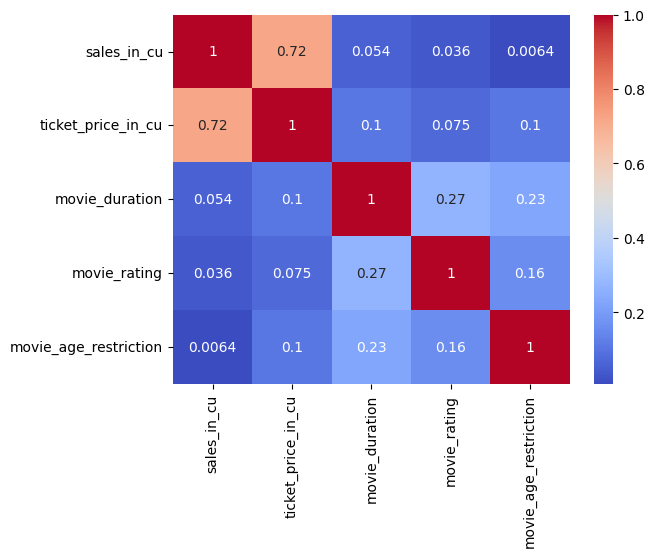

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns


df = pd.read_csv('/content/cinema_successful_orders.csv', delimiter=';')

# Преобразование данных movie_rating в тип float, очистка от некорректных данных
for col in ['movie_rating']:
    df[col] = df[col].str.replace(',', '.').fillna(0).astype(float)
df = df[df['movie_rating'] > 0]

# Преобразование movie_duration в тип float, очистка от некорректных данных
df['movie_duration'] = df['movie_duration'].astype(str)
df['movie_duration'] = df['movie_duration'].str.replace(' мин.', '').str.replace(' минут', '').str.replace('-', '0').astype(float)
df = df[df['movie_duration'] > 0]
df['movie_duration'] = df['movie_duration'].astype(str)
for col in ['movie_duration']:
  df[col] = df[col].str.replace(',', '.').astype(float)

# Преобразование sales_in_cu и ticket_price_in_cu в тип int
df['sales_in_cu'] = df['sales_in_cu'].str.replace(',', '.').astype(float)
df['sales_in_cu'] = df['sales_in_cu'].round().astype(int)
df['ticket_price_in_cu'] = df['ticket_price_in_cu'].str.replace(',', '.').astype(float)
df['ticket_price_in_cu'] = df['ticket_price_in_cu'].round().astype(int)

df['movie_age_restriction'] = df['movie_age_restriction'].str.replace('+', '').fillna('0').astype(int)

'''
genre_columns = [col for col in df.columns if 'genre_is_' in col]

encoder = OneHotEncoder(sparse=False) # one-hot enconding
cinema_address_encoded = encoder.fit_transform(df[['cinema_address']])
cinema_address_df = pd.DataFrame(cinema_address_encoded, columns=encoder.get_feature_names_out(['cinema_address']))
df = df.join(cinema_address_df) '''

correlation_matrix = df[['sales_in_cu', 'ticket_price_in_cu', 'movie_duration', 'movie_rating', 'movie_age_restriction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Матрица корреляций показывает степень линейной зависимости между двумя параметрами. С помощью нее мы можем произвести отбор признаков, которые стоит учитывать при обучении модели (чем больше зависимость по модулю, тем лучше данный признак подойдет нам для нашей модели). Как мы видим, лучше всего взять признаки movie_duration, movie_rating и movie_age_restriction для предсказывания ticket_price_in_cu.

In [ ]:
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('/content/cinema_successful_orders.csv', delimiter=';')

for col in ['movie_rating']:
    df[col] = df[col].str.replace(',', '.').fillna(0).astype(float)
df = df[df['movie_rating'] > 0]

df['movie_duration'] = df['movie_duration'].astype(str)
df['movie_duration'] = df['movie_duration'].str.replace(' мин.', '').str.replace(' минут', '').str.replace('-', '0').astype(float)
df = df[df['movie_duration'] > 0]
df['movie_duration'] = df['movie_duration'].astype(str)
for col in ['movie_duration']:
  df[col] = df[col].str.replace(',', '.').astype(float)

df['sales_in_cu'] = df['sales_in_cu'].str.replace(',', '.').astype(float)
df['sales_in_cu'] = df['sales_in_cu'].round().astype(int)

df['ticket_price_in_cu'] = df['ticket_price_in_cu'].str.replace(',', '.').astype(float)
df['icket_price_in_cu'] = df['ticket_price_in_cu'].round().astype(int)

df['movie_age_restriction'] = df['movie_age_restriction'].str.replace('+', '').fillna('0').astype(int)

valid_indexes = df['movie_rating'].dropna().index #подгоним под размерность корректных данных рейтинга
df = df.loc[valid_indexes]

scaler = StandardScaler()

df['ticket_price_in_cu_standardized'] = scaler.fit_transform(df[['ticket_price_in_cu']])
df['movie_duration_standardized'] = scaler.fit_transform(df[['movie_duration']])
df['movie_age_restriction_standardized'] = scaler.fit_transform(df[['movie_age_restriction']])
df['movie_rating_standardized'] = scaler.fit_transform(df[['movie_rating']])

X = df[['movie_duration_standardized', 'movie_age_restriction_standardized', 'movie_rating_standardized']]
y = df['ticket_price_in_cu_standardized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Среднеквадратичная ошибка (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации (R^2): {r2_score(y_test, y_pred)}')

<ipython-input-28-ccd966bb9c61>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movie_duration'] = df['movie_duration'].astype(str)


Среднеквадратичная ошибка (MSE): 0.9513399883124252
Коэффициент детерминации (R^2): 0.0198229635954722


В целом, у нас получилось улучшить метрики качества линейной регрессии, однако стоит отметить, что такие данные могут указывать на то, что выручка за билет не линейно зависит от характеристик фильма. Возможно, для лучших показателей стоит попробовать модель градиентного бустинга или деревья решений.
